
# Lab Sheet: PCA & SVD  
**Course:** Foundations of Data Science (CS F320)  
**Institute:** BITS Pilani  

This notebook walks through **Principal Component Analysis (PCA)** and  
**Singular Value Decomposition (SVD)** step by step with theory + Python code.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



## Dimensionality Reduction

- **Feature Selection:** Removing irrelevant or redundant features  
- **Feature Extraction:** Projecting data to a lower-dimensional space  
- **Curse of Dimensionality:** Model performance degrades as dimensions grow without enough data  

Two popular techniques:
- **Principal Component Analysis (PCA)**
- **Singular Value Decomposition (SVD)**


## Creating a correlated dataset

In [2]:

np.random.seed(1)

x1 = np.random.normal(loc=50, scale=3, size=50)
x2 = 0.5 * x1 + np.random.normal(loc=0, scale=np.sqrt(3), size=50)

dataset = pd.DataFrame({"x1": x1, "x2": x2})
dataset.head()


,x1,x2
0,54.873036,27.956428
1,48.164731,23.472251
2,48.415485,22.228843
3,46.781094,22.785468
4,52.596223,25.936296


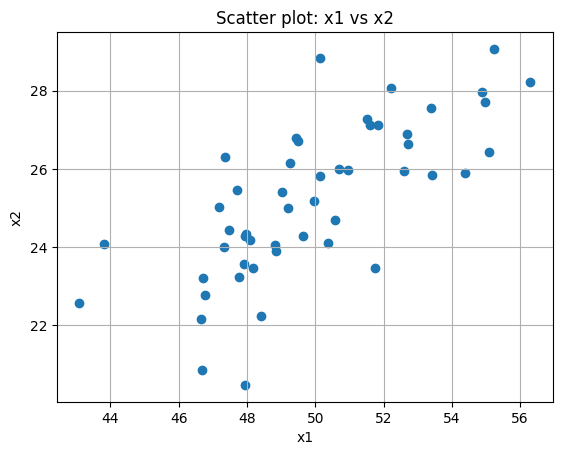

In [3]:

plt.scatter(dataset["x1"], dataset["x2"])
plt.title("Scatter plot: x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


## Step 1: Centering the data

In [4]:

dataset_centered = dataset.copy()
dataset_centered["mu_x1"] = dataset["x1"] - dataset["x1"].mean()
dataset_centered["mu_x2"] = dataset["x2"] - dataset["x2"].mean()

dataset_centered[["mu_x1", "mu_x2"]].head()


,mu_x1,mu_x2
0,4.949581,2.740642
1,-1.758725,-1.743535
2,-1.507971,-2.986943
3,-3.142361,-2.430318
4,2.672767,0.720510


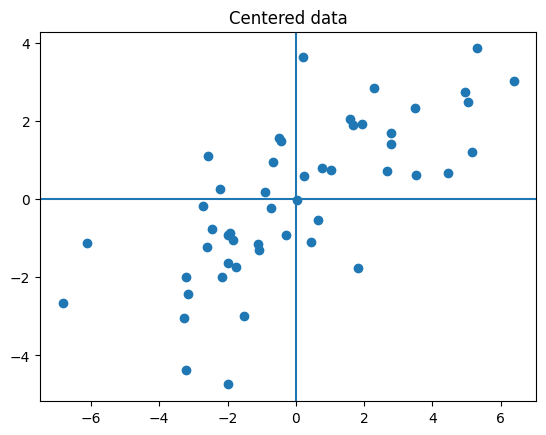

In [5]:

plt.scatter(dataset_centered["mu_x1"], dataset_centered["mu_x2"])
plt.axhline(0); plt.axvline(0)
plt.title("Centered data")
plt.show()


## Step 2: Covariance Matrix

In [6]:

X = dataset_centered[["mu_x1", "mu_x2"]].values
n = X.shape[0]

cov_mat = (X.T @ X) / (n - 1)
cov_mat


array([[8.63360245, 4.22609685],
       [4.22609685, 3.94139228]])

## Eigen Decomposition

In [7]:

e_values, e_vectors = eig(cov_mat)

idx = np.argsort(e_values)[::-1]
e_values = e_values[idx]
e_vectors = e_vectors[:, idx]

pc1, pc2 = e_vectors[:, 0], e_vectors[:, 1]

e_values, e_vectors


(array([11.12114026,  1.45385447]),
 array([[ 0.86179173, -0.50726228],
        [ 0.50726228,  0.86179173]]))

## Variance Explained

In [8]:

variance_ratio = e_values / e_values.sum()

variance_df = pd.DataFrame({
    "PC": ["PC1", "PC2"],
    "Variance": e_values,
    "Variance_Ratio": variance_ratio,
    "Percent": variance_ratio * 100
})

variance_df


,PC,Variance,Variance_Ratio,Percent
0,PC1,11.121140,0.884385,88.438528
1,PC2,1.453854,0.115615,11.561472


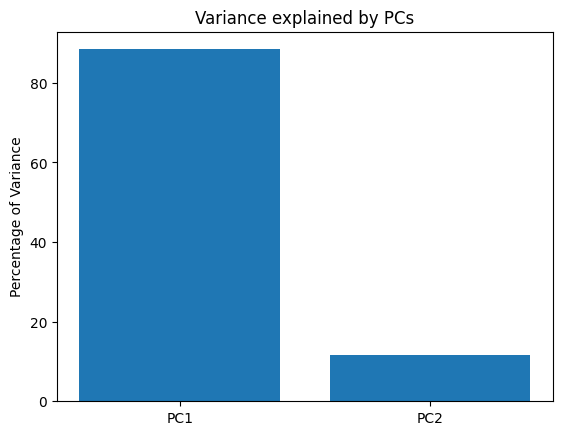

In [9]:

plt.bar(variance_df["PC"], variance_df["Percent"])
plt.ylabel("Percentage of Variance")
plt.title("Variance explained by PCs")
plt.show()


## Projection onto Principal Components

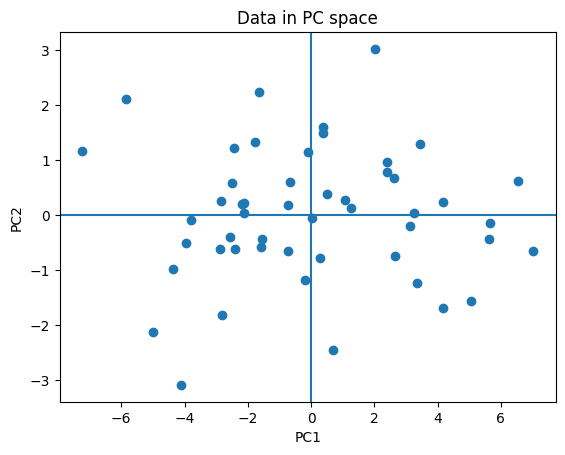

In [10]:

X_rot = X @ e_vectors

plt.scatter(X_rot[:,0], X_rot[:,1])
plt.axhline(0); plt.axvline(0)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data in PC space")
plt.show()


## PCA using scikit-learn

In [11]:

pca_model = PCA(n_components=2)
pca_model.fit(dataset[["x1", "x2"]])

pca_model.explained_variance_, pca_model.explained_variance_ratio_


(array([11.12114026,  1.45385447]), array([0.88438528, 0.11561472]))

## PCA on real dataset (mtcars / mpg)

In [12]:

try:
    import statsmodels.api as sm
    mtcars = sm.datasets.get_rdataset("mtcars").data
except:
    import seaborn as sns
    mtcars = sns.load_dataset("mpg").dropna()

X_real = mtcars.select_dtypes(include=[np.number])
X_scaled = StandardScaler().fit_transform(X_real)

pca_real = PCA()
pca_real.fit(X_scaled)

np.cumsum(pca_real.explained_variance_ratio_)


array([0.71580512, 0.83946103, 0.94351728, 0.96979087, 0.98720749,
       0.99495851, 1.        ])

## Singular Value Decomposition (SVD)

In [13]:

A = np.array([
    [ 4, -5, -1],
    [ 7, -2,  3],
    [-1,  4, -3],
    [ 8,  2,  6]
], dtype=float)

U, s, Vt = np.linalg.svd(A, full_matrices=False)

Sigma = np.diag(s)
A_recon = U @ Sigma @ Vt

np.linalg.norm(A - A_recon)


np.float64(4.573525985495315e-15)